In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

%matplotlib inline
from IPython.display import display,HTML,display_html
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from IPython.display import display,HTML,display_html

In [248]:
import pandas as pd
item_categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
sales_train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")



In [249]:
display(items.shape)
display(shops.shape)
display(sales_train.shape)
display(item_categories.shape)

(22170, 3)

(60, 2)

(2935849, 6)

(84, 2)

In [250]:
print(sales_train.head(3))
print(sales_train.isnull().sum())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [251]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [252]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [253]:
sales_train = pd.merge(sales_train, items.drop('item_name', axis=1), on='item_id')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37


In [254]:
#sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')
#sales_train['month']=sales_train['date'].dt.month
#sales_train['year']=sales_train['year'].dt.year
#sales_train['date']=pd.to_datetime(sales_train['date'])
#sales_train[['Drop_Year','Drop_Month','Drop_day']]=sales_train['date'].apply(lambda x:pd.Series(x.strftime("%Y,%m,%d").split("-")))

#sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
#sales_train['month'] = sales_train['date'].dt.month
#sales_train['year'] = sales_train['date'].dt.year
#sales_train['day'] = sales_train['date'].dt.day
#sales_train['weekday'] = sales_train['date'].dt.weekday




sales_train['date'] = sales_train['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))
sales_train['year'] = sales_train['date'].apply(lambda x: x.year)
sales_train['month'] = sales_train['date'].apply(lambda x: x.month)
sales_train['day'] = sales_train['date'].apply(lambda x: x.day)




del sales_train['date']

display(sales_train.head(3))



,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
0,0,59,22154,999.0,1.0,37,2013,1,2
1,0,24,22154,999.0,1.0,37,2013,1,23
2,0,27,22154,999.0,1.0,37,2013,1,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d2429d9b0>,
      dtype=object)

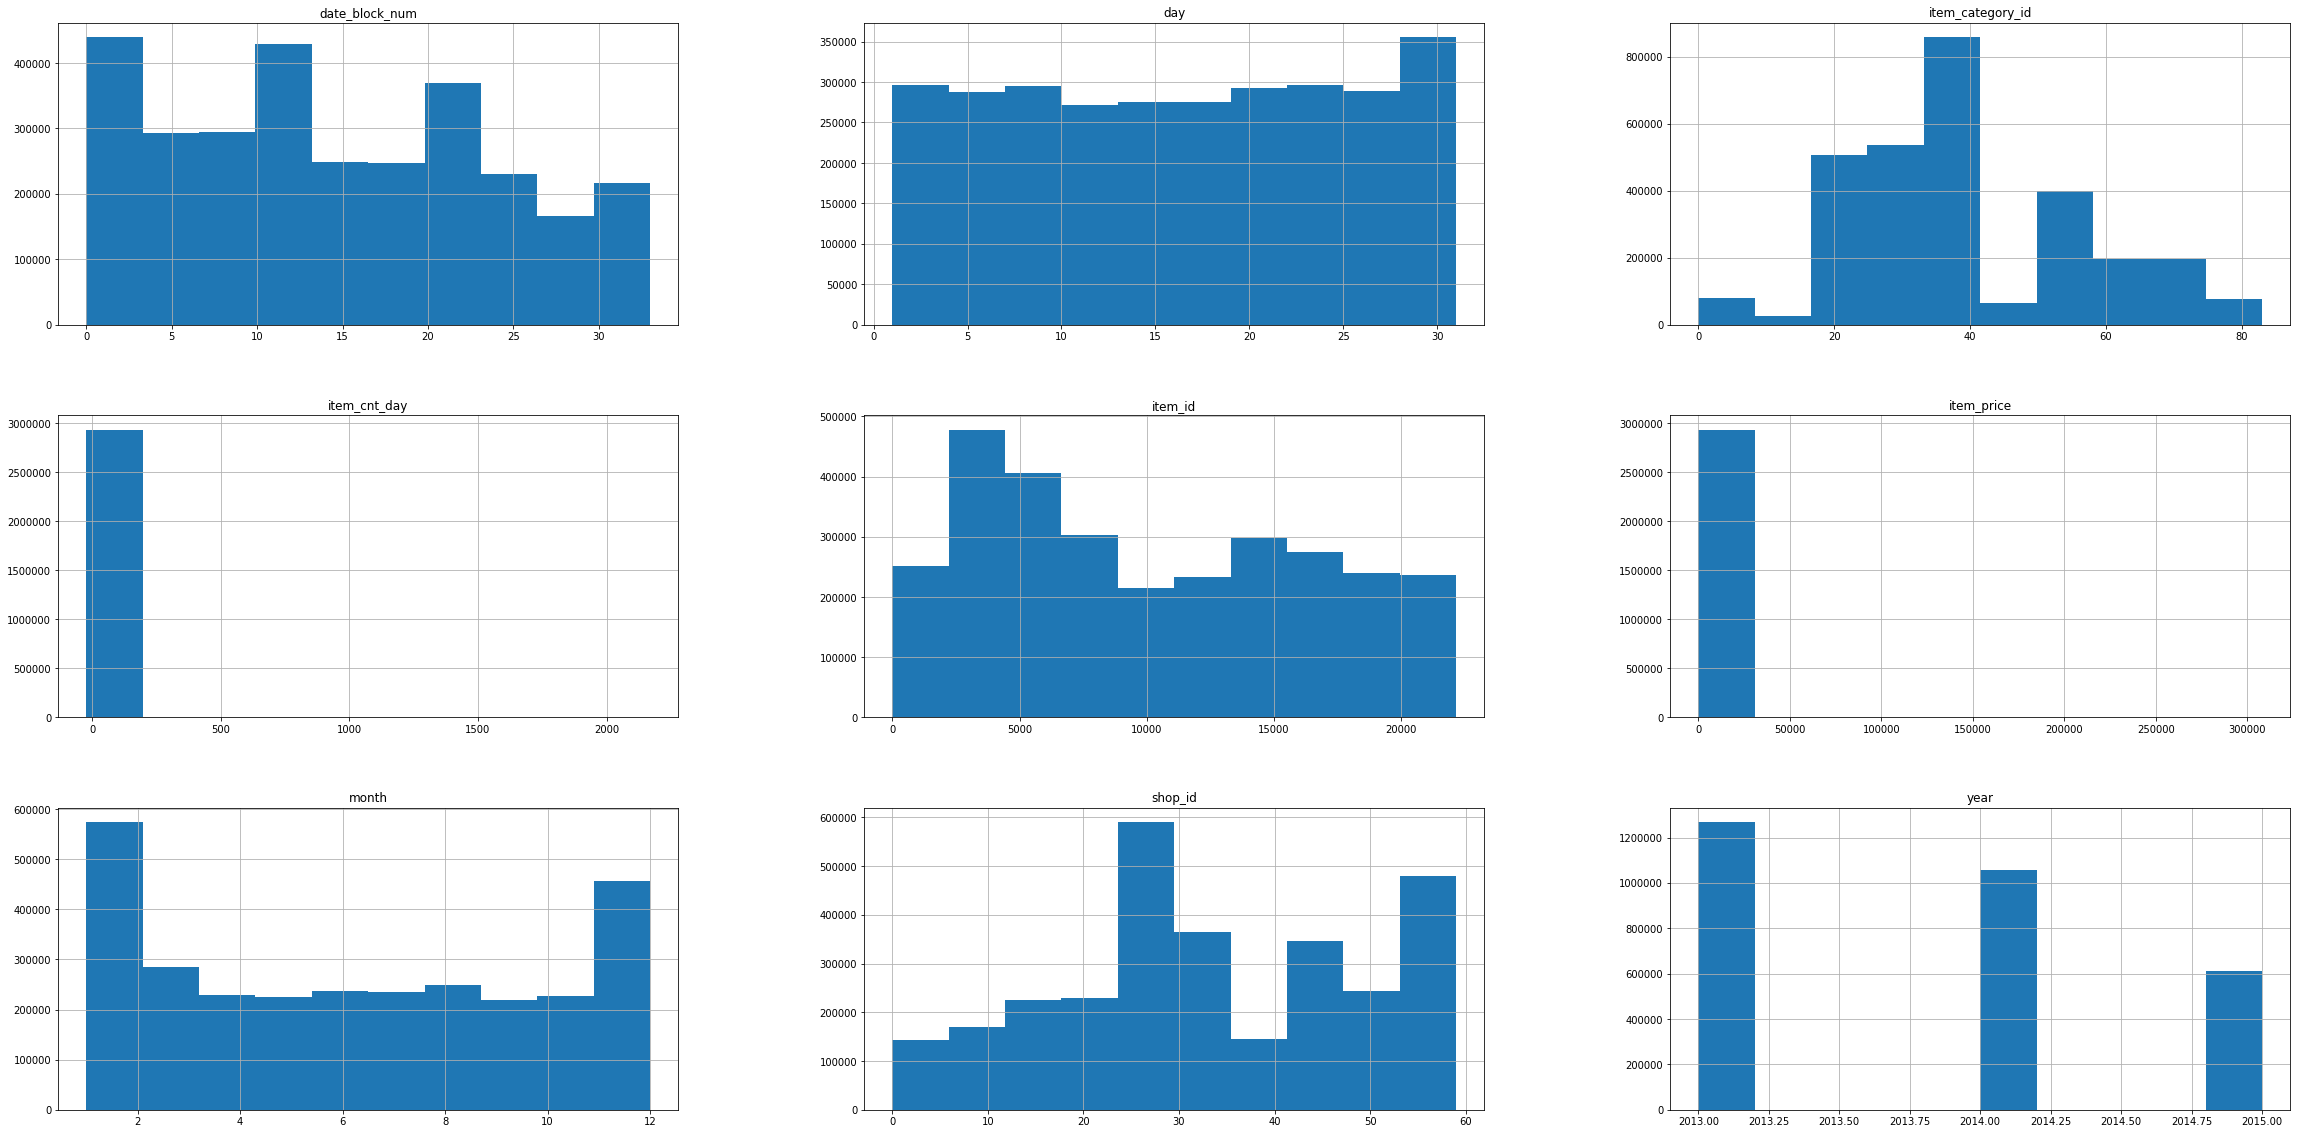

In [255]:
sales_train.hist(figsize=(40,20))

In [256]:
sales_train['item_id'].unique()

array([22154,  2552,  2554, ...,  7610,  7635,  7640])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402,0.029128,0.928280,0.243939,0.018890
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230,0.019380,0.011805,0.020574,0.001767
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650,0.369431,0.010340,-0.002034,-0.002784
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197,-0.253554,0.080192,0.044049,0.014729
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000,0.014768,0.002699,0.018014,0.005218
item_category_id,0.029128,0.019380,0.369431,-0.253554,0.014768,1.000000,0.030141,-0.000986,-0.000171
year,0.928280,0.011805,0.010340,0.080192,0.002699,0.030141,1.000000,-0.134203,-0.015505
month,0.243939,0.020574,-0.002034,0.044049,0.018014,-0.000986,-0.134203,1.000000,0.090769
day,0.018890,0.001767,-0.002784,0.014729,0.005218,-0.000171,-0.015505,0.090769,1.000000


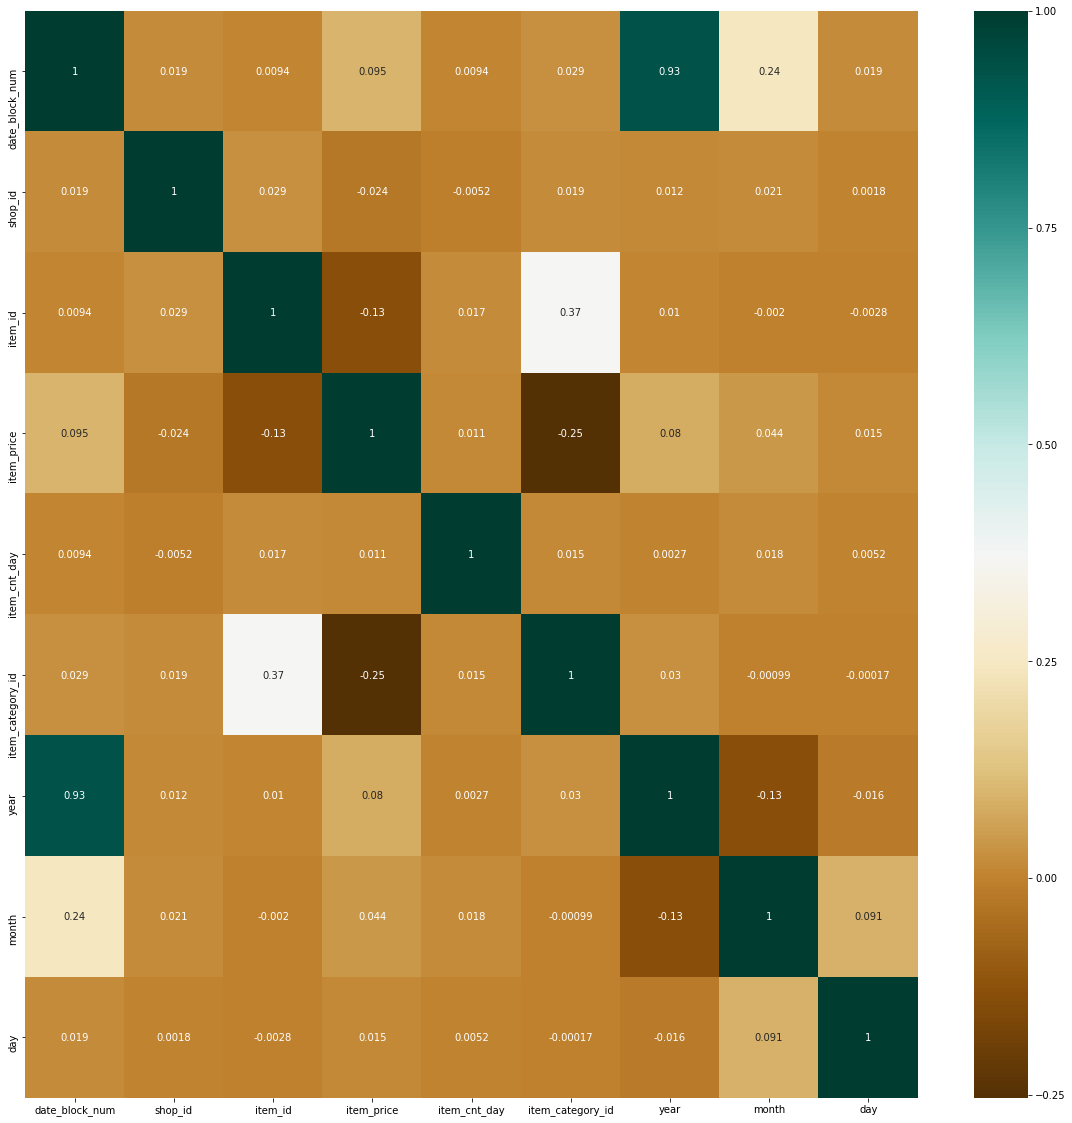

In [257]:
plt.figure(figsize=(20,20))
c_map= sales_train.corr()
sns.heatmap(c_map,cmap='BrBG',annot=True)
c_map

In [258]:
#plt.plot(sales_train['year'], sales_train['item_price'])
#plt.xlabel('year')
#plt.ylabel('item_price')
#plt.show()
#fig,ax=plt.subplots(figsize=(20,6))
#sales_train['year'].plot(ax=ax)
#ax.set_title('Item_Price')
#ax.set_ylabel('item_price')
#ax.set_xlabel('month')
#ax.xaxis.set_ticks_position('bottom')
#fig.tight_layout();


#ales_train['month'].plot(figsize=(15, 6))
#plt.show()
#sales_train['year'].unique()
#sales_train.set_index('date',inplace=True)


#sales_train['item_price'].plot(figsize=(45,10))
#plt.show()


In [259]:
#sales_train['item_cnt_day'].plot(figsize=(25,10))
#plt.show()

In [260]:
#sales_train.drop(sales_train.index, inplace=True)
#sales_train.head(3)

In [261]:
sales_train.plot.scatter(x='shop_id', y='item_price', figsize=(10,10))   #done

In [262]:
sales_train.plot.scatter(x='month', y='item_price', figsize=(10,10))   #done

In [263]:
sales_train.plot.scatter(x='year', y='item_price', figsize=(10,10))   #done

In [264]:
ax = sns.scatterplot(x="day", y="item_price", data=sales_train)   #done


In [265]:
sales_train.plot.scatter(x='weekday', y='item_price', figsize=(10,10))   #done

In [266]:
sales_train.plot.scatter(x='item_id', y='item_cnt_day', figsize=(10,10))  #done

In [267]:
sales_train['item_price'].plot.box(figsize=(10,8))  # done

In [268]:
print(sales_train['item_cnt_day'].plot.box(figsize=(10,8)))   #done

In [269]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01,2.013777e+03,6.247717e+00,1.585267e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01,7.684790e-01,3.536219e+00,8.923483e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01,2.013000e+03,3.000000e+00,8.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01,2.014000e+03,6.000000e+00,1.600000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01,2.014000e+03,9.000000e+00,2.400000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01,2.015000e+03,1.200000e+01,3.100000e+01


> ****Data Cleaning******

In [270]:
display(sales_train['item_price'].max())
display(sales_train['item_price'].min())
display(sales_train['item_price'].mean())
display(sales_train['item_cnt_day'].max())
display(sales_train['item_cnt_day'].min())
display(sales_train['item_cnt_day'].mean())


307980.0

-1.0

890.8532326980403

2169.0

-22.0

1.242640885140891

In [271]:
sales_train[sales_train['item_price'] < 0]=sales_train['item_price'].mean()
sales_train[sales_train['item_cnt_day'] < 0]=sales_train['item_cnt_day'].mean()

print(sales_train['item_price'].min())
print(sales_train['item_cnt_day'].min())

0.07
1.0


In [272]:
print(sales_train['item_price'].min())
print(sales_train.isnull().any())

0.07
date_block_num      False
shop_id             False
item_id             False
item_price          False
item_cnt_day        False
item_category_id    False
year                False
month               False
day                 False
dtype: bool


In [273]:
#lower_bound=0.1
#upper_bound=0.95
#outlier_detection=sales_train['item_price'].quantile([lower_bound,upper_bound])

#print("Upper_bound and Lower_bound",outlier_detection)
#true_index=(outlier_detection.loc[lower_bound] < sales_train['item_price'].values),(sales_train['item_price'].values < outlier_detection.loc[upper_bound])



In [274]:
#removing item_price outliers

Q1 = sales_train["item_price"].quantile(0.25)
Q3 = sales_train["item_price"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)
sales_train= sales_train[~((sales_train ["item_price"] < Lower_Fence) |(sales_train["item_price"] > Upper_Fence))]
print(sales_train['item_price'].max())

sales_train['item_cnt_day']=sales_train['item_cnt_day'].clip(0,20)
print(sales_train['item_cnt_day'].min())
print(sales_train['item_cnt_day'].max())



750.0
-876.0
2124.0
2124.0
1.0
20.0


In [275]:
sales_train.groupby(['item_id'])['item_price'].agg(["mean", "max", "min", "std", "count"])

,mean,max,min,std,count
item_id,,,,,
0.000000,58.000000,58.000000,58.000000,NaN,1
1.242944,1.242944,1.242944,1.242944,0.000000,7356
2.000000,58.000000,58.000000,58.000000,0.000000,2
3.000000,79.000000,100.000000,58.000000,29.698485,2
4.000000,58.000000,58.000000,58.000000,NaN,1
...,...,...,...,...,...
22164.000000,713.561499,749.000000,379.620000,65.949547,407
22165.000000,59.000000,59.000000,59.000000,0.000000,2
22166.000000,150.000000,150.000000,150.000000,0.000000,270


In [276]:
sales_train.drop_duplicates(keep=False,inplace=True)
print(sales_train['item_cnt_day'].min())
print(sales_train['item_cnt_day'].max())
#sales_train = sales_train.groupby(['shop_id', 'date_block_num', 'item_id', 'year', 'month'], as_index=False)['item_cnt_day'].sum().rename(columns={'item_cnt_day':'item_cnt_month'})


1.0
20.0


In [277]:
sales_train.head(3)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,day
0,0.0,59.0,22154.0,999.0,1.0,37.0,2013.0,1.0,2.0
1,0.0,24.0,22154.0,999.0,1.0,37.0,2013.0,1.0,23.0
2,0.0,27.0,22154.0,999.0,1.0,37.0,2013.0,1.0,20.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X=sales_train.drop(['item_cnt_day','date_block_num','year','month','day'],axis=1)
Y=sales_train['item_cnt_day'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
print('Train rmse:',mean_squared_error(y_train, rf_train_pred))
print('Validation rmse:',(mean_squared_error(y_test, rf_test_pred)))

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
train_reg=reg.predict(X_train)
test_reg=reg.predict(X_test)
print('Train rmse:',mean_squared_error(y_train, train_reg))
print('Validation rmse:',mean_squared_error(y_test, test_reg))

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
print (model)
train_output=model.predict(X_train)
test_output=model.predict(X_test)
print(train_output)
print('Validation rmse:',mean_squared_error(y_test,test_output))


In [ ]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train) 
y_regre_train = regressor.predict(X_train) 
y_regre_test = regressor.predict(X_test)
print('Train rmse:',mean_squared_error(y_train,y_regre_train))
print('Validation rmse:',mean_squared_error(y_test,y_regre_test))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Train rmse: 0.7103990167492005
Validation rmse: 0.7176966783590013


Train rmse: 1.1783012876784138
Validation rmse: 1.1808877779039928


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


[1.2090421 1.11214   1.1722049 ... 1.1043489 1.09024   1.1598159]
Validation rmse: 0.8283874265268684


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Train rmse: 0.4850552363991081
Validation rmse: 0.6976955589142916
